# Comparison of the Different Merge_After
- Number of initial chains: 7
- Vary merge_after parameter (1, 2, 3, 4) (as 5 is mean and median, majority of chains still have merge during generation)

In [29]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from utils import *

In [30]:
experiments = [f"m1_{i}" for i in range(1, 5)] + [f"m2_{i}" for i in range(1, 5)] + [f"n1_{i}" for i in range(1, 5)] +  [f"n2_{i}" for i in range(1, 5)]
complete_folders = check_existing_folders(experiments)


ERROR n1_1 has missing files
['n1_1_em_results.jsonl', 'n1_1_llm_comparison_results.jsonl', 'n1_1_roscoe_results.tsv', 'n1_1_bert_score_results.jsonl', 'n1_1_f1_results.jsonl']

ERROR n2_1 has missing files
['n2_1_em_results.jsonl', 'n2_1_llm_comparison_results.jsonl', 'n2_1_roscoe.jsonl', 'n2_1_roscoe_results.tsv', 'n2_1_bert_score_results.jsonl', 'n2_1_f1_results.jsonl']

ERROR n2_3 has missing files
['n2_3_em_results.jsonl', 'n2_3_llm_comparison_results.jsonl', 'n2_3_roscoe.jsonl', 'n2_3_roscoe_results.tsv', 'n2_3_bert_score_results.jsonl', 'n2_3_f1_results.jsonl']

ERROR n2_4 has missing files
['n2_4_em_results.jsonl', 'n2_4_llm_comparison_results.jsonl', 'n2_4_roscoe.jsonl', 'n2_4_roscoe_results.tsv', 'n2_4_bert_score_results.jsonl', 'n2_4_f1_results.jsonl']

Folders with all required files:
['m1_1', 'm1_2', 'm1_3', 'm1_4', 'm2_1', 'm2_2', 'm2_3', 'm2_4', 'n1_2', 'n1_3', 'n1_4', 'n2_2']


In [26]:
line_color_map = {
    "n1": "#4a90e2",  # blueish
    "n2": "#50e3c2",
    "m1": "#b8e986",  # greenish
    "m2": "#7ed321"
}

marker_style_map = {
    "n": ("^", "#edae49"),  # entailment-based
    "m": ("x", "#00798c"),  # embedding-based
}

In [27]:
def plot_k_curve(metric_file_name="_em_results.jsonl", metric_column=None, metric_name="predicted", ylabel="Score", title="@Run 2: Vary $k$"):
    data = {}

    for exp in experiments:
        if metric_column is None:
            score = compute_accuracy(exp, metric_file_name, metric_name)
        else:
            score = compute_roscoe_metric(exp, metric_file_name, metric_column)

        base = exp[:-2]  # e.g., m1 from m1_1
        k = int(exp.split("_")[1])

        if base not in data:
            data[base] = {}
        data[base][k] = score

    fig, ax = plt.subplots(figsize=(10, 6))

    for base, k_scores in data.items():
        ks = sorted(k_scores.keys())
        scores = [k_scores[k] for k in ks]
        line_color = line_color_map[base]
        marker_type, marker_color = marker_style_map[base[0]]
        ax.plot(ks, scores, label=base.upper(), color=line_color, linewidth=2)
        ax.scatter(ks, scores, marker=marker_type, color=marker_color, s=80, zorder=5)

    ax.set_xlabel("k")
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks([1, 2, 3, 4])
    ax.set_ylim(0, 1)
    ax.grid(True, linestyle="--", alpha=0.6)

    legend_lines = [
        Line2D([0], [0], color="#edae49", marker="^", linestyle="None", markersize=10, label="Entailment-based"),
        Line2D([0], [0], color="#00798c", marker="x", linestyle="None", markersize=10, label="Embedding-based")
    ]
    legend_lines += [
        Line2D([0], [0], color=line_color_map[k], lw=2, label=k.upper()) for k in ["n1", "n2", "m1", "m2"]
    ]

    ax.legend(handles=legend_lines, title="Clustering method / Experiment")
    plt.tight_layout()
    plt.show()

ERROR: ../experiments_results\n1_1\n1_1_em_results.jsonl not found. Defaulting to 100% accuracy.
ERROR: ../experiments_results\n2_1\n2_1_em_results.jsonl not found. Defaulting to 100% accuracy.
ERROR: ../experiments_results\n2_3\n2_3_em_results.jsonl not found. Defaulting to 100% accuracy.
ERROR: ../experiments_results\n2_4\n2_4_em_results.jsonl not found. Defaulting to 100% accuracy.


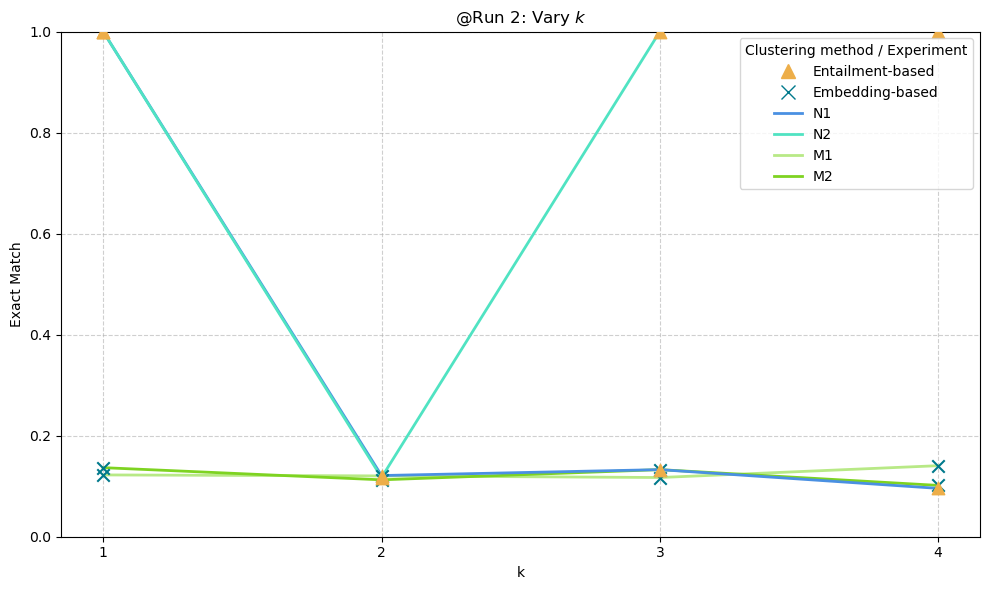

In [28]:
plot_k_curve(metric_file_name="_em_results.jsonl", metric_column=None, metric_name="predicted", ylabel="Exact Match")